In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:,.0f}'.format

In [88]:
# reading in files from current folder
num1 = pd.read_json('num1.json')
num2 = pd.read_csv('num2.csv')

In [89]:
# checking on the dataframes content
num1['value'] = num1['value'].replace({None: 0})
num1['value'] = num1['value'].fillna(0)
num1.drop_duplicates()
num1.head()

,a,ds,h,tag,version,coreg,ddate,qtrs,uom,value,footnote
0,6955,23,85,AccountsPayableCurrent,us-gaap/2023,None,20231130,0,USD,"45,505,000",None
1,6955,23,85,AccountsPayableCurrent,us-gaap/2023,None,20230831,0,USD,"50,483,000",None
2,6955,23,85,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,us-gaap/2023,None,20231130,0,USD,"114,020,000",None
3,6955,23,85,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,us-gaap/2023,None,20230831,0,USD,"111,668,000",None
4,6955,23,85,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2023,None,20231130,0,USD,"-120,840,000",None


In [90]:
# checking on the dataframes content
num2['value'] = num2['value'].replace({None: 0})
num2['value'] = num2['value'].fillna(0)
num2.drop_duplicates()
num2.head()

,a,ds,h,tag,version,coreg,ddate,qtrs,uom,value,footnote
0,6955,23,85,AccountsPayableCurrent,us-gaap/2023,NaN,20230731,0,USD,"3,658,783,337",NaN
1,6955,23,85,AccountsPayableCurrent,us-gaap/2023,NaN,20230731,0,USD,"1,823,028,137",NaN
2,6955,23,85,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,us-gaap/2023,NaN,20230731,0,USD,"2,357,306,187",NaN
3,6955,23,85,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,us-gaap/2023,NaN,20230630,0,USD,"728,763,452",NaN
4,6955,23,85,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2023,NaN,20221031,0,USD,"57,018,988",NaN


In [91]:
# 1
# creating unique key columns for both tables

# num1['entity'] = num1.apply(lambda x: str(x['a']) + '-' + str(x['ds']) + '-' + str(x['h']), axis = 1)
# num2['entity'] = num2.apply(lambda x: str(x['a']) + '-' + str(x['ds']) + '-' + str(x['h']), axis = 1)
num1['unique_key'] = num1.apply(lambda x: str(x['a']) + str(x['h']) + str(x['tag']) + str(x['version']) + str(x['ddate']) + str(x['coreg']) + str(x['qtrs']) + str(x['uom']) + str(x['footnote']), axis = 1)
num2['unique_key'] = num2.apply(lambda x: str(x['a']) + str(x['h']) + str(x['tag']) + str(x['version']) + str(x['ddate']) + str(x['coreg']) + str(x['qtrs']) + str(x['uom']) + str(x['footnote']), axis = 1)

In [92]:
# checking for duplicates of unique key
print(len(num1['unique_key'].unique()) == len(num1))
print(len(num2['unique_key'].unique()) == len(num2))
print(len(num1['unique_key'].unique()))
print(len(num2['unique_key'].unique()))

True
False
1048575
898119


In [93]:
# For num2 dataframe I'll group by every column but 'value' and next sum 'value' column 
num2 = num2.groupby(['a', 'ds', 'h', 'tag', 'version', 'coreg', 'ddate', 'qtrs', 'uom', 'footnote', 'unique_key'], as_index=False, dropna=False).sum().replace({np.nan: None})
print(len(num2['unique_key'].unique()) == len(num2))

True


In [94]:
# 2
# joining on a unique key

merged_on_key = pd.merge(num1, num2, on='unique_key', how='outer')
merged_on_key['value'] = merged_on_key['value_x'] + merged_on_key['value_y']
merged_on_key.head()

,a_x,ds_x,h_x,tag_x,version_x,coreg_x,ddate_x,qtrs_x,uom_x,value_x,...,h_y,tag_y,version_y,coreg_y,ddate_y,qtrs_y,uom_y,footnote_y,value_y,value
0,"1,000,753",23,52,AccountsAndOtherReceivablesNetCurrent,us-gaap/2023,None,"20,221,231",0,USD,"622,764,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52,AccountsAndOtherReceivablesNetCurrent,us-gaap/2023,None,"20,221,231",0,USD,None,"876,000",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52,AccountsAndOtherReceivablesNetCurrent,us-gaap/2023,None,"20,230,331",0,USD,None,"436,000",NaN
3,"1,000,753",23,52,AccountsAndOtherReceivablesNetCurrent,us-gaap/2023,None,"20,230,930",0,USD,"656,695,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1,000,753",23,52,AccountsPayableCurrent,us-gaap/2023,None,"20,221,231",0,USD,"7,732,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# I think the above result might be achieved by following code

num1 = pd.read_json('num1.json')
num2 = pd.read_csv('num2.csv')

num2 = num2.groupby(['a', 'ds', 'h', 'tag', 'version', 'coreg', 'ddate', 'qtrs', 'uom', 'footnote'], as_index=False, dropna=False).sum().replace({np.nan: None})
merged = pd.merge(num1, num2, on=['a', 'ds', 'h', 'tag', 'version', 'coreg', 'ddate', 'uom', 'qtrs', 'footnote'], how='outer')
merged['value_x'] = merged['value_x'].replace({np.nan: 0})
merged['value_y'] = merged['value_y'].replace({np.nan: 0})
merged['value'] = merged['value_x'] + merged['value_y']
merged.drop(['value_x', 'value_y'], inplace=True, axis=1)
merged.head()


,a,ds,h,tag,version,coreg,ddate,qtrs,uom,footnote,value
0,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20221231,0,USD,None,"2,508,375,958"
1,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20230630,0,USD,None,"44,482,000,000"
2,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20230930,0,USD,None,"2,245,000,000"
3,2488,23,195,AccountsPayableOtherCurrentAndNoncurrent,us-gaap/2023,None,20211231,0,USD,None,"15,921,000,000"
4,2488,23,195,AccountsPayableOtherCurrentAndNoncurrent,us-gaap/2023,None,20221231,0,USD,None,"15,546,000,000"


In [96]:
# 3
# pivoting

merged['entity'] = merged.apply(lambda x: str(x['a']) + '-' + str(x['ds']) + '-' + str(x['h']), axis = 1)


In [97]:
pivoted = pd.pivot_table(merged, values = 'value', index = ['entity', 'tag'], columns = 'ddate', aggfunc = sum)
pivoted

C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\2792378899.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivoted = pd.pivot_table(merged, values = 'value', index = ['entity', 'tag'], columns = 'ddate', aggfunc = sum)


ddate                                                           19320731  \
entity        tag                                                          
1000753-23-52 AccountsAndOtherReceivablesNetCurrent                  NaN   
              AccountsPayableCurrent                                 NaN   
              AccruedHealthInsuranceCosts                            NaN   
              AccruedLiabilitiesCurrent                              NaN   
              AccruedPayrollTaxesCurrent                             NaN   
...                                                                  ...   
99780-23-143  TreasuryStockValue                                     NaN   
              TreasuryStockValueAcquiredCostMethod                   NaN   
              ValuationAllowanceDeferredTaxAssetChangeInAmount       NaN   
              WeightedAverageNumberOfDilutedSharesOutstanding        NaN   
              WeightedAverageNumberOfSharesOutstandingBasic          NaN   

ddate                                                           19861231  \
entity        tag                                                          
1000753-23-52 AccountsAndOtherReceivablesNetCurrent                  NaN   
              AccountsPayableCurrent                                 NaN   
              AccruedHealthInsuranceCosts                            NaN   
              AccruedLiabilitiesCurrent                              NaN   
              AccruedPayrollTaxesCurrent                             NaN   
...                                                                  ...   
99780-23-143  TreasuryStockValue                                     NaN   
              TreasuryStockValueAcquiredCostMethod                   NaN   
              ValuationAllowanceDeferredTaxAssetChangeInAmount       NaN   
              WeightedAverageNumberOfDilutedSharesOutstanding        NaN   
              WeightedAverageNumberOfSharesOutstandingBasic          NaN   

ddate                                                           19890531  \
entity        tag                                                          
1000753-23-52 AccountsAndOtherReceivablesNetCurrent                  NaN   
              AccountsPayableCurrent                                 NaN   
              AccruedHealthInsuranceCosts                            NaN   
              AccruedLiabilitiesCurrent                              NaN   
              AccruedPayrollTaxesCurrent                             NaN   
...                                                                  ...   
99780-23-143  TreasuryStockValue                                     NaN   
              TreasuryStockValueAcquiredCostMethod                   NaN   
              ValuationAllowanceDeferredTaxAssetChangeInAmount       NaN   
              WeightedAverageNumberOfDilutedSharesOutstanding        NaN   
              WeightedAverageNumberOfSharesOutstandingBasic          NaN   

ddate                                                           19930930  \
entity        tag                                                          
1000753-23-52 AccountsAndOtherReceivablesNetCurrent                  NaN   
              AccountsPayableCurrent                                 NaN   
              AccruedHealthInsuranceCosts                            NaN   
              AccruedLiabilitiesCurrent                              NaN   
              AccruedPayrollTaxesCurrent                             NaN   
...                                                                  ...   
99780-23-143  TreasuryStockValue                                     NaN   
              TreasuryStockValueAcquiredCostMethod                   NaN   
              ValuationAllowanceDeferredTaxAssetChangeInAmount       NaN   
              WeightedAverageNumberOfDilutedSharesOutstanding        NaN   
              WeightedAverageNumberOfSharesOutstandingBasic          NaN   

ddate                                       

In [98]:
# 4
# calculating relative changes 
rel_values = []
columns = pivoted.columns
for i in range(len(columns)):
    if i == 0:
        rel_values.append(1)
    else:
        new_value = pivoted[columns[i]].sum()
        old_value = pivoted[columns[i-1]].sum()
        if old_value == 0:
            rel_values.append('cannot calculate relative value change')
        else:
            rel_values.append((new_value-old_value)/old_value)

print(rel_values)
# it may appear 'old_value' is 0. it is impossible to express relative value versus 0 and also it is impossible to divide by 0.
# I think it depends on domain expertise how to handle such situations. I decided to display a text.

[1, -0.9999985000000375, 0.3333333333333333, -0.75, -0.99, 231437500.0, -0.1358358082167504, 6.4999999625000004, -0.9999999666666667, 19999999.0, -0.97949995, -0.9765220084829062, -0.7916060669021401, -1.0, 'cannot calculate relative value change', 171.28431292137597, -0.4944120631187025, 22.91713747645951, -0.5118110236220472, -0.9999999769580645, 11689766203.675905, -0.9981497005988024, -0.8999029126213592, 6.1290016165535075, -0.15101653959033653, -0.9999999998931629, 39.0, 798524274.0, -0.990310250743473, 8.693053311793214, 0.20283365833333336, 12.856169181303878, -0.9904800000000952, -0.9999992072478991, 136.80310056976282, 6249.0, 101.03415034, 1.0777357315523268, -0.8393675694775037, 4.028428964824395, -0.9505862375988516, -0.9975618181862512, 465.0745712155108, 4.759944720530683, 12.932309535576916, -0.9201695729935965, -0.9950049865147339, 33.39994152009942, -0.9999997093023256, 49285776.0, 2.077155509793424, 97.9154170728679, -0.9999950005040085, 665.6666666666666, 2.726, -0.

In [99]:
# 5
# presenting data connected to a tag

task_5 = merged[merged['tag'] == 'AccountsPayableCurrent']
task_5


,a,ds,h,tag,version,coreg,ddate,qtrs,uom,footnote,value,entity
0,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20221231,0,USD,None,"2,508,375,958",2488-23-195
1,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20230630,0,USD,None,"44,482,000,000",2488-23-195
2,2488,23,195,AccountsPayableCurrent,us-gaap/2023,None,20230930,0,USD,None,"2,245,000,000",2488-23-195
2493,3570,23,97,AccountsPayableCurrent,us-gaap/2023,None,20221231,0,USD,None,"446,044,000",3570-23-97
2494,3570,23,97,AccountsPayableCurrent,us-gaap/2023,None,20230630,0,USD,None,"302,156,000",3570-23-97
...,...,...,...,...,...,...,...,...,...,...,...,...
1825039,1977837,23,15,AccountsPayableCurrent,us-gaap/2023,None,20230630,0,USD,None,"946,000",1977837-23-15
1825040,1977837,23,15,AccountsPayableCurrent,us-gaap/2023,None,20230831,0,USD,None,"25,808",1977837-23-15
1825206,1993004,23,6,AccountsPayableCurrent,us-gaap/2023,None,20221231,0,USD,None,"202,609,000",1993004-23-6
1825207,1993004,23,6,AccountsPayableCurrent,us-gaap/2023,None,20230630,0,USD,None,"530,000",1993004-23-6


In [100]:
task_5_pivoted = pd.pivot_table(task_5, values = 'value', index = ['entity'], columns = 'ddate', aggfunc = sum)
task_5_pivoted


C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\2873510355.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  task_5_pivoted = pd.pivot_table(task_5, values = 'value', index = ['entity'], columns = 'ddate', aggfunc = sum)


ddate,20101231,20140131,20161231,20170131,20191231,20200331,20200531,20200630,20200930,20201231,...,20230228,20230331,20230430,20230531,20230630,20230731,20230831,20230930,20231031,20231130
entity,,,,,,,,,,,,,,,,,,,,,
1000753-23-52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"53,300,000",NaN,NaN,"7,207,000",NaN,NaN
100122-23-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-3,NaN,NaN,"151,565,000",NaN,NaN
1002638-23-32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"163,478,000",NaN,NaN,"138,460,000",NaN,NaN
1003078-23-102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"-15,988,020",NaN,NaN,NaN,NaN,"226,299,000",NaN,NaN,NaN
100517-23-186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-12,NaN,NaN,"8,412,000,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96021-23-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"6,025,757,000",NaN,NaN,"5,796,398,000",NaN,NaN
97134-23-59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"98,500,000",NaN,NaN
97216-23-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0,NaN,NaN,"668,300,000",NaN,NaN


In [101]:
# 6
# compare changes of Liabilities for particular entities
merged[merged['tag']=='Liabilities'][merged['entity']=='6955-23-85']

C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\2283598670.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged[merged['tag']=='Liabilities'][merged['entity']=='6955-23-85']


,a,ds,h,tag,version,coreg,ddate,qtrs,uom,footnote,value,entity
20723,6955,23,85,Liabilities,us-gaap/2023,None,20230731,0,USD,None,"17,293,931",6955-23-85
20724,6955,23,85,Liabilities,us-gaap/2023,None,20230831,0,USD,None,"435,977,000",6955-23-85
20725,6955,23,85,Liabilities,us-gaap/2023,None,20231130,0,USD,None,"443,891,000",6955-23-85


In [102]:
print(f"""For entity "6955-23-85" Liabilities has increased {merged['value'].iloc[20725]/merged['value'].iloc[20723]} times""")

For entity "6955-23-85" Liabilities has increased 25.667443682989138 times


In [103]:
merged[merged['tag']=='Liabilities'][merged['entity']=='1493152-23-40704']

C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\2504015590.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged[merged['tag']=='Liabilities'][merged['entity']=='1493152-23-40704']


,a,ds,h,tag,version,coreg,ddate,qtrs,uom,footnote,value,entity
1300524,1493152,23,40704,Liabilities,us-gaap/2023,None,20221231,0,USD,None,"4,776,363",1493152-23-40704
1300525,1493152,23,40704,Liabilities,us-gaap/2023,None,20230630,0,USD,None,"9,920,276",1493152-23-40704
1300526,1493152,23,40704,Liabilities,us-gaap/2023,None,20230930,0,USD,None,"12,114,149",1493152-23-40704


In [104]:
print(f"""For entity "1493152-23-40704" Liabilities has increased {merged['value'].iloc[1300526]/merged['value'].iloc[1300524]} times""")

For entity "1493152-23-40704" Liabilities has increased 2.5362705891491077 times


In [105]:
# 7
# charts

C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\3849008344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_data['value'][dist_data['tag']=='Liabilities'], hist=False)


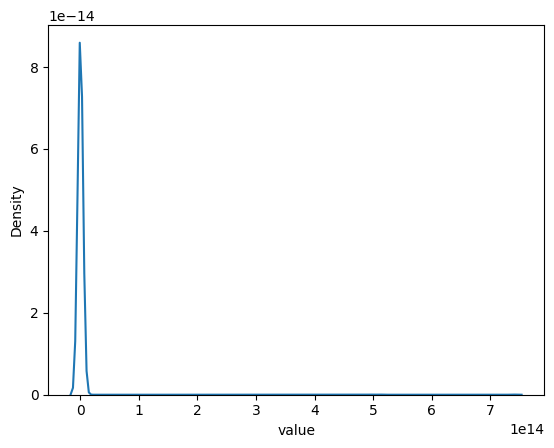

In [106]:
dist_data = merged[['entity', 'value', 'tag']].groupby(by=['tag', 'entity'], as_index=False).sum()
sns.distplot(dist_data['value'][dist_data['tag']=='Liabilities'], hist=False)
plt.show()

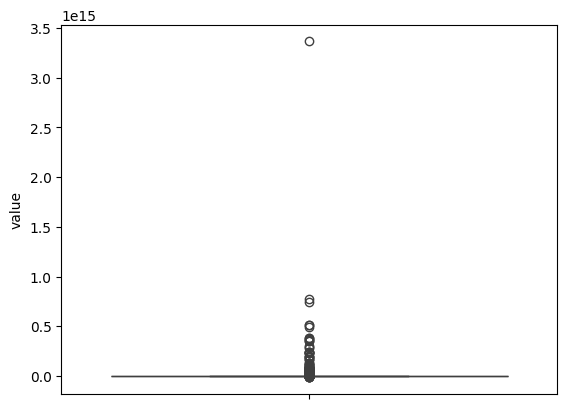

In [107]:
boxdata = merged[['entity', 'value', 'tag', 'ddate']].groupby(by=['ddate', 'tag', 'entity'], as_index=False).sum()
sns.boxplot(dist_data['value'][boxdata['ddate']>20220131])
plt.show()

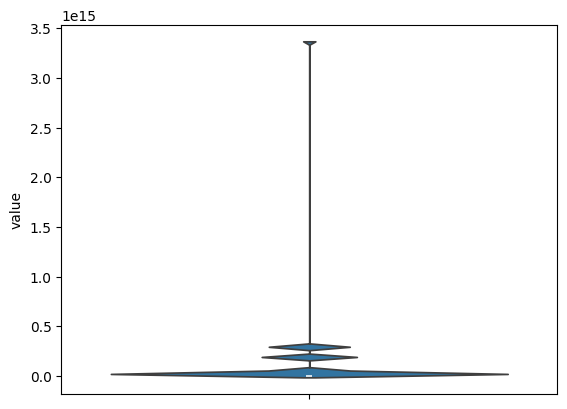

In [108]:
sns.violinplot(dist_data['value'][boxdata['ddate']>20220131])
plt.show()

In [109]:
# finding 10 most common entities
merged['entity'].value_counts()[:10]

entity
4904-23-121         5374
1109357-23-97       4894
65984-23-94         4676
92122-23-101        3955
1008654-23-79       2583
1108426-23-57       2570
1437749-23-32284    2488
922224-23-49        2435
1628280-23-34289    2295
109177-23-54        2272
Name: count, dtype: int64

In [110]:
line_df = merged[['entity', 'tag', 'value', 'ddate']][merged['entity']=='4904-23-121'][merged['tag']=='AccountsPayableCurrent'].groupby(by=['ddate', 'tag', 'entity'], as_index=False).sum().sort_values('ddate')
line_df

C:\Users\m021077\AppData\Local\Temp\ipykernel_6920\1655355895.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  line_df = merged[['entity', 'tag', 'value', 'ddate']][merged['entity']=='4904-23-121'][merged['tag']=='AccountsPayableCurrent'].groupby(by=['ddate', 'tag', 'entity'], as_index=False).sum().sort_values('ddate')


,ddate,tag,entity,value
0,20201231,AccountsPayableCurrent,4904-23-121,"108,000"
1,20211231,AccountsPayableCurrent,4904-23-121,"2,000"
2,20220331,AccountsPayableCurrent,4904-23-121,"-645,000"
3,20220630,AccountsPayableCurrent,4904-23-121,"-8,326,000"
4,20221231,AccountsPayableCurrent,4904-23-121,"1,461,141,000"
5,20230331,AccountsPayableCurrent,4904-23-121,"-313,346"
6,20230430,AccountsPayableCurrent,4904-23-121,"-116,127"
7,20230630,AccountsPayableCurrent,4904-23-121,"589,745,000"
8,20230930,AccountsPayableCurrent,4904-23-121,"4,117,300,000"


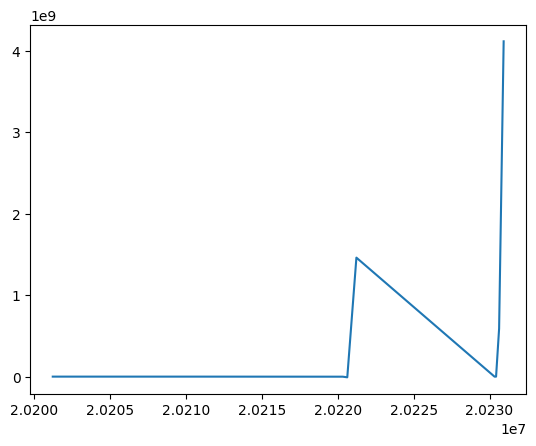

In [111]:
plt.plot(line_df['ddate'], line_df['value'])
plt.show()

In [112]:
# finding 10 most common entities
top_10 = merged['entity'].value_counts()[:10]
top_10 = top_10.index
top_10

Index(['4904-23-121', '1109357-23-97', '65984-23-94', '92122-23-101',
       '1008654-23-79', '1108426-23-57', '1437749-23-32284', '922224-23-49',
       '1628280-23-34289', '109177-23-54'],
      dtype='object', name='entity')

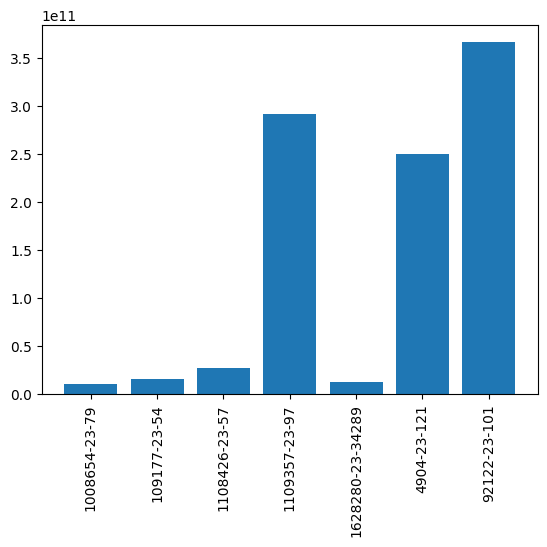

In [113]:
bar_df = merged.loc[merged['entity'].isin(top_10)]
bar_df = bar_df[['entity', 'value', 'tag']].groupby(by=['entity', 'tag'], as_index=False).sum()
plt.bar(bar_df['entity'][bar_df['tag']=='Liabilities'], bar_df['value'][bar_df['tag']=='Liabilities'])
plt.xticks(rotation='vertical')
plt.show()

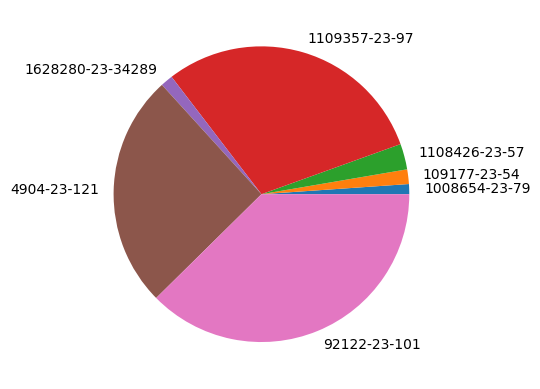

In [114]:
plt.pie(bar_df['value'][bar_df['tag']=='Liabilities'], labels=bar_df['entity'][bar_df['tag']=='Liabilities'])
plt.show()